In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/housing_LR.csv')

In [3]:
# prompt: df

data


,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...,...
7273,7460,Яшнободский,1,38.0,5,5,24500.0
7274,7461,Яшнободский,2,49.0,1,4,32000.0
7275,7462,Шайхантахурский,2,64.0,3,9,40000.0
7276,7463,Мирзо-Улугбекский,1,18.0,1,4,11000.0


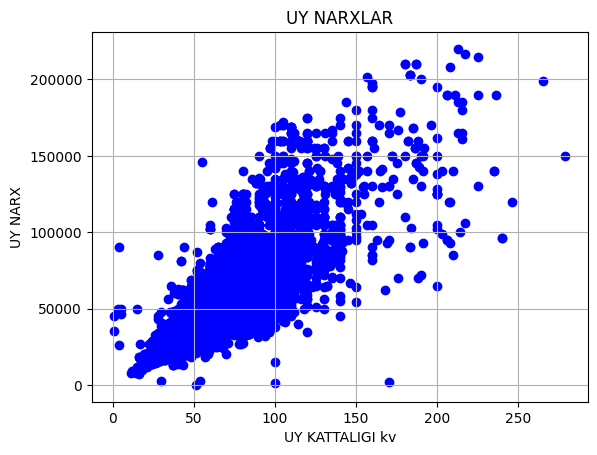

In [5]:
# Scatter grafik
plt.scatter(data["size"], data["price"], color="blue") # Changed df to data
plt.title("UY NARXLAR")
plt.xlabel("UY KATTALIGI kv")
plt.ylabel("UY NARX")
plt.grid()
plt.show()

In [6]:
X = data["size"]
y = data["price"]

In [7]:
X.head()

,size
0,57.0
1,52.0
2,42.0
3,65.0
4,70.0


In [8]:
y.head()

,price
0,52000.0
1,56000.0
2,37000.0
3,49500.0
4,55000.0


In [9]:
X = data["size"].values.reshape(-1, 1)
y = data["price"].values.reshape(-1, 1)

In [10]:
X[:5]

array([[57.],
       [52.],
       [42.],
       [65.],
       [70.]])

In [11]:
y[:5]

array([[52000.],
       [56000.],
       [37000.],
       [49500.],
       [55000.]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=56)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model = LinearRegression()

In [16]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [17]:
print(lr_model.coef_)
print(lr_model.intercept_)

[[788.54517068]]
[-1258.06848734]


In [18]:
y_pred = lr_model.predict(x_test)
y_pred

array([[24763.92214494],
       [36592.09970507],
       [ 9781.56390212],
       ...,
       [30283.73833967],
       [69710.99687342],
       [38169.19004642]])

In [19]:
data = pd.DataFrame({"asosiy qiymat": y_test.flatten(), "Suniy intelekt qiymat": y_pred.flatten()})
data

,asosiy qiymat,Suniy intelekt qiymat
0,31000.0,24763.922145
1,37800.0,36592.099705
2,8000.0,9781.563902
3,28700.0,38169.190046
4,50000.0,53940.093460
...,...,...
5090,19000.0,19244.105950
5091,70000.0,57882.819313
5092,31500.0,30283.738340
5093,51000.0,69710.996873


In [20]:
x_test

array([[33.],
       [48.],
       [14.],
       ...,
       [40.],
       [90.],
       [50.]])

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [22]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

In [23]:
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)

MAE: 12181.030736860987
MSE: 315179806.5326653
RMSE: 17753.30410184722
R2: 0.6402166314751492


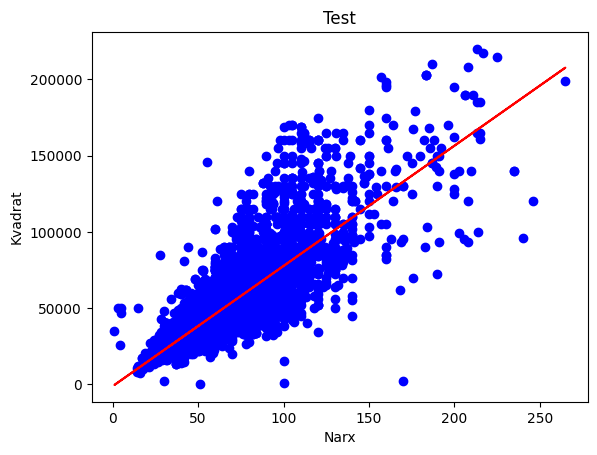

In [24]:
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test, y_pred, color="red")
plt.title("Test")
plt.xlabel("Narx")
plt.ylabel("Kvadrat")
plt.show()